<h1><center>Supervised ML Regression Competition</center></h1>


<img align="center" src="https://compraracciones.com/wp-content/uploads/2021/04/insurance.jpg" style="height:200px" style="width:100px"/>

<hr style="border:2px solid pink"> </hr>

You have been assigned the task of building a model that will predict the insurance cost

You'll find the data in the csv file `insurance`


- target col: "charges"


<hr style="border:2px solid pink"> </hr>


**Guidelines:** 


- train_test_split
    - random state = 42
    - test size = 0.3


- The one who gets the highest r2-score on test data wins


## 1. Initial Data Exploration

Let's start by loading our dataset and taking a first look at it.


In [2]:
import pandas as pd

# Load the CSV file
file_path = "insurance.csv"  # Replace with your file path
insurance_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(insurance_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   7725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## 2. Checking for Missing Values

It's important to know if our data has any missing values. Let's check that next.


In [3]:
import pandas as pd
from tabulate import tabulate

# Count missing values per column
missing_values_per_column = insurance_df.isnull().sum()

# Create a table for missing values
table = [(col, missing) for col, missing in missing_values_per_column.items()]

# Print the table using tabulate
print(tabulate(table, headers=["Column Name", "Missing Values"], tablefmt="grid"))



+---------------+------------------+
| Column Name   |   Missing Values |
+===============+==================+
| age           |                0 |
+---------------+------------------+
| sex           |                0 |
+---------------+------------------+
| bmi           |                0 |
+---------------+------------------+
| children      |                0 |
+---------------+------------------+
| smoker        |                0 |
+---------------+------------------+
| region        |                0 |
+---------------+------------------+
| charges       |                0 |
+---------------+------------------+


In [4]:
#  **Column Name** | **Type**             | **Reason**                |
# |------------------|----------------------|-------------------------|
# | `age`           | Numerical            | Continuous               |
# | `sex`           | Categorical          | male/female
# | `bmi`           | Numerical            | Continuous               |
# | `children`      | Numerical (Discrete) | Count of children is a whole number.           |
# | `smoker`        | Categorical          | Binary category (yes/no)                    |
# | `region`        | Categorical          | distinct groups (regions).          |
# | `charges`       | Numerical            | Continuous     |


# Variables categorized into tuples
numerical_var = ("age", "bmi", "children", "charges")
categorical_var = ("sex", "smoker", "region")


## 3. Descriptive Statistics

Now, let's move on to some descriptive statistics.

Understanding the distribution of our data is crucial. Let's calculate some descriptive statistics.


In [5]:
# Converting var tuples to lists
numerical_var_list = list(numerical_var)
categorical_var_list = list(categorical_var)


numerical_stats = insurance_df[numerical_var_list].describe()
categorical_stats = insurance_df[categorical_var_list].describe()


table_numerical_stats = tabulate(
    numerical_stats.reset_index(), 
    headers=["Statistic"] + numerical_var_list, 
    tablefmt="grid"
)

table_categorical_stats = tabulate(
    categorical_stats.reset_index(),
    headers=["Statistic"] + categorical_var_list,
    tablefmt="grid"
)

# Print descriptive statistics in tabulated format
print("Descriptive Statistics for Numerical Variables:")
print(table_numerical_stats)

# Print descriptive statistics in tabulated format
print("Descriptive Statistics for Numerical Variables:")
print(table_categorical_stats)



Descriptive Statistics for Numerical Variables:
+----+-------------+----------+------------+------------+-----------+
|    | Statistic   |      age |        bmi |   children |   charges |
+====+=============+==========+============+============+===========+
|  0 | count       | 1338     | 1338       | 1338       |   1338    |
+----+-------------+----------+------------+------------+-----------+
|  1 | mean        |   39.207 |   30.6634  |    1.09492 |  15799.6  |
+----+-------------+----------+------------+------------+-----------+
|  2 | std         |   14.05  |    6.09819 |    1.20549 |  12560    |
+----+-------------+----------+------------+------------+-----------+
|  3 | min         |   18     |   15.96    |    0       |   1121.87 |
+----+-------------+----------+------------+------------+-----------+
|  4 | 25%         |   27     |   26.2963  |    0       |   8106.48 |
+----+-------------+----------+------------+------------+-----------+
|  5 | 50%         |   39     |   30.4    

## 4. Distribution Analysis

Visualizing the distributions of our features can provide valuable insights. Let's plot the distributions for 'age', 'bmi', and 'charges'.

### Task:
- Plot the histogram for 'age'
- Plot the histogram for 'bmi'
- Plot the histogram for 'charges'


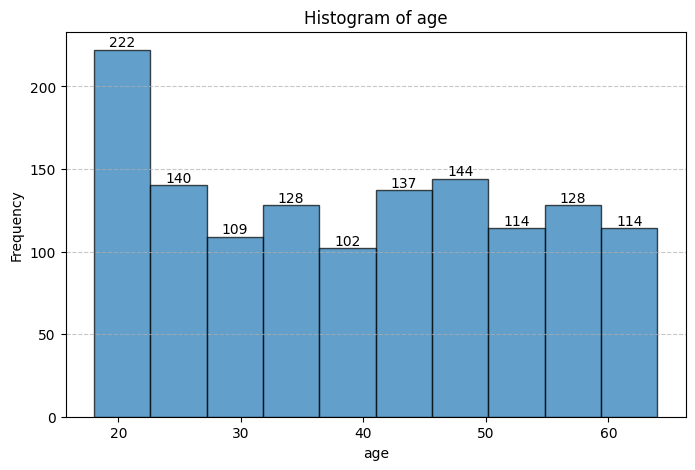

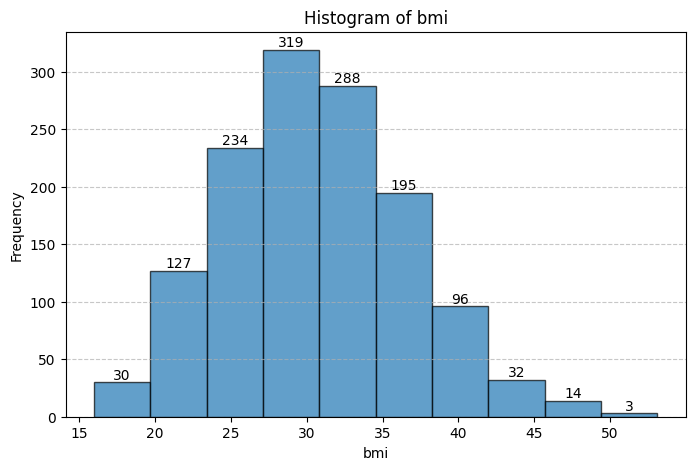

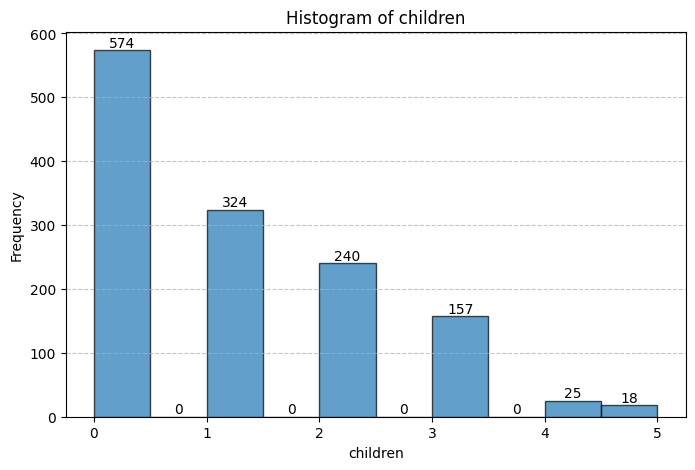

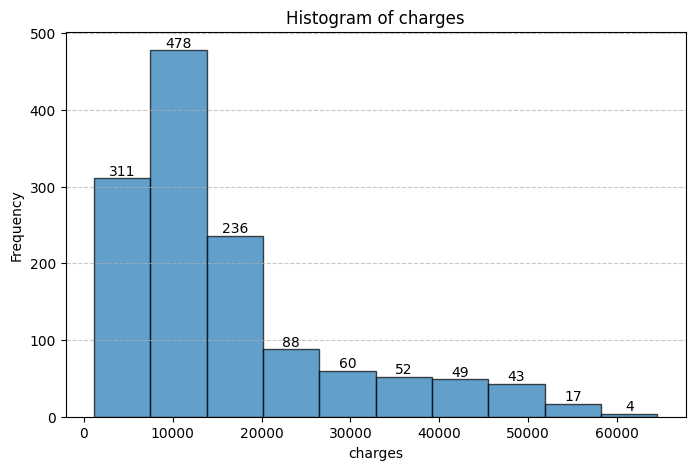

In [6]:
import matplotlib.pyplot as plt


# Plot histograms with numbers on top
for col in numerical_var:
    plt.figure(figsize=(8, 5))
    counts, bins, patches = plt.hist(insurance_df[col], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add numbers on top of each bar
    for i in range(len(patches)):
        plt.text(
            bins[i] + (bins[1] - bins[0]) / 2,  # X position (center of the bin)
            counts[i] + 0.2,  # Y position (slightly above the bar)
            int(counts[i]),  # Text to display (count)
            ha='center', va='bottom', fontsize=10
        )

    plt.show()

## 5. Relationship Between Variables

Let's explore the relationship between some of our features and the target variable 'charges'. We'll create scatter plots to visualize these relationships.

### Task:
- Create a scatter plot for 'age' vs 'charges'
- Create a scatter plot for 'bmi' vs 'charges'
- Create a scatter plot for 'children' vs 'charges'


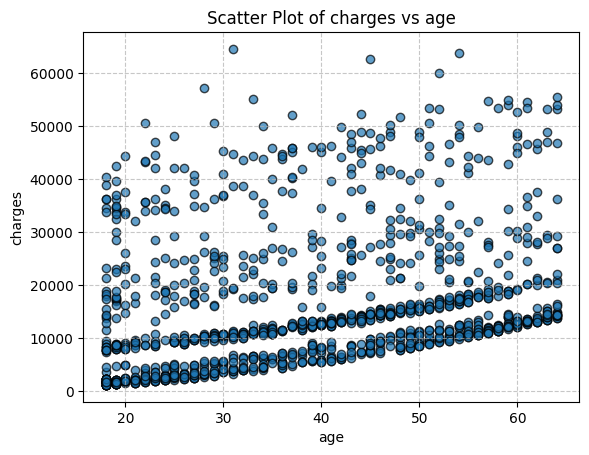

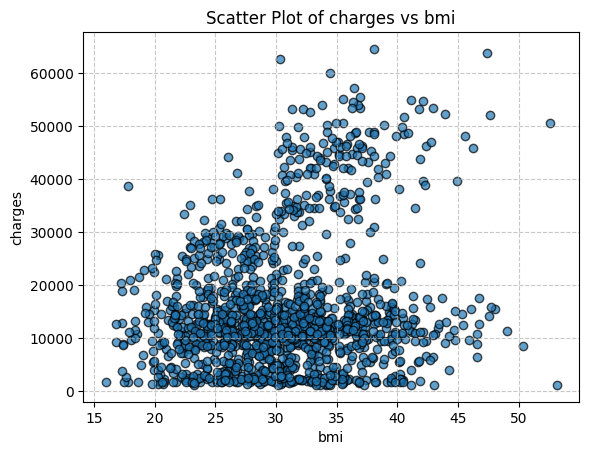

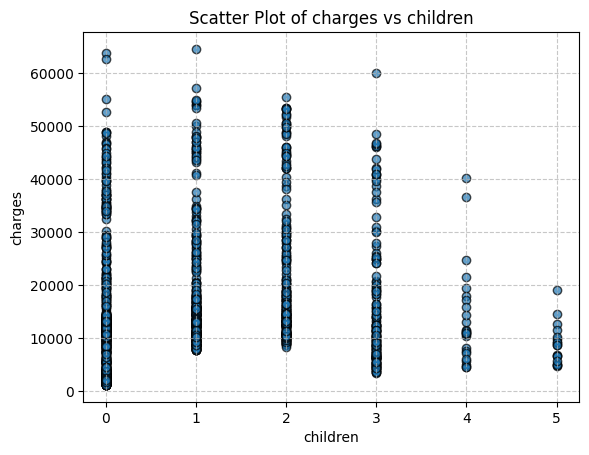

In [7]:
import matplotlib.pyplot as plt

target_variable = 'charges'

for var in numerical_var_list:
    if var == target_variable:
        # Skip plotting if the variable is the same as the target
        continue
    
    plt.figure()  # Create a new figure for each plot
    plt.scatter(insurance_df[var], insurance_df[target_variable], alpha=0.7, edgecolor='black')
    plt.title(f'Scatter Plot of {target_variable} vs {var}')
    plt.xlabel(var)
    plt.ylabel(target_variable)
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

## 6. Categorical Analysis

Let's analyze the categorical features 'sex', 'smoker', and 'region' to see how they relate to 'charges'.

### Task:
- Plot the distribution of 'charges' for different 'sex'
- Plot the distribution of 'charges' for different 'smoker'
- Plot the distribution of 'charges' for different 'region'


C:\Users\Dan\AppData\Local\Temp\ipykernel_3916\3476011862.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insurance_df[cat_var], y=insurance_df[target_variable], palette="Set2")


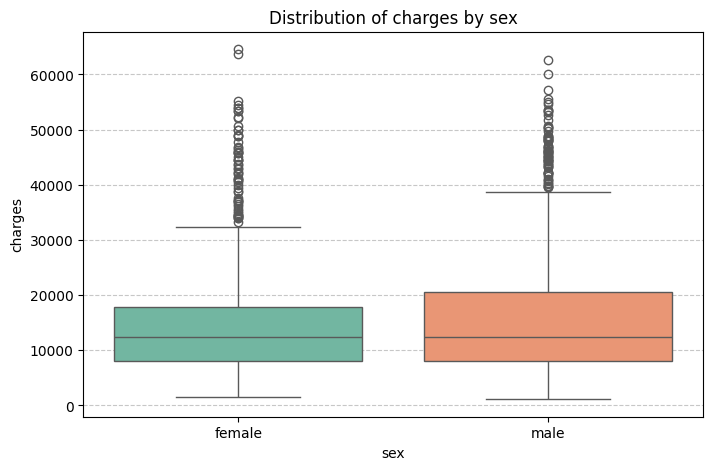

C:\Users\Dan\AppData\Local\Temp\ipykernel_3916\3476011862.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insurance_df[cat_var], y=insurance_df[target_variable], palette="Set2")


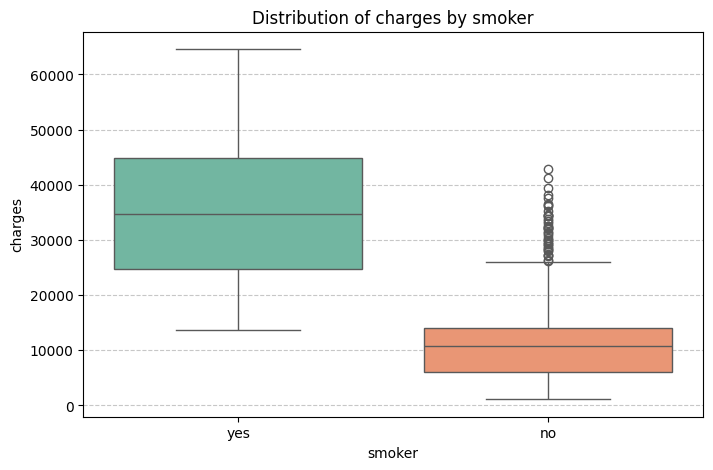

C:\Users\Dan\AppData\Local\Temp\ipykernel_3916\3476011862.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=insurance_df[cat_var], y=insurance_df[target_variable], palette="Set2")


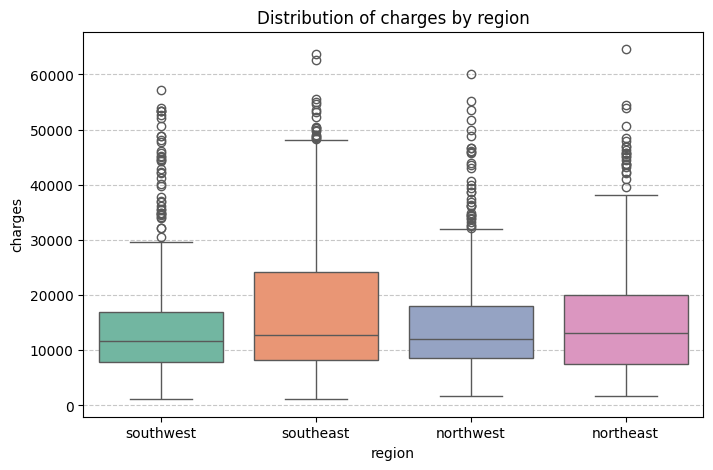

In [8]:
import seaborn as sns


# Plot distributions
for cat_var in categorical_var_list:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=insurance_df[cat_var], y=insurance_df[target_variable], palette="Set2")
    plt.title(f"Distribution of {target_variable} by {cat_var}")
    plt.xlabel(cat_var)
    plt.ylabel(target_variable)
    plt.grid(axis='y', linestyle="--", alpha=0.7)
    plt.show()

## 7. Correlation Analysis

To understand how our numerical features relate to each other and to the target variable, let's calculate and visualize the correlation matrix.

### Task:
- Calculate the correlation matrix for the dataset
- Visualize the correlation matrix using a heatmap


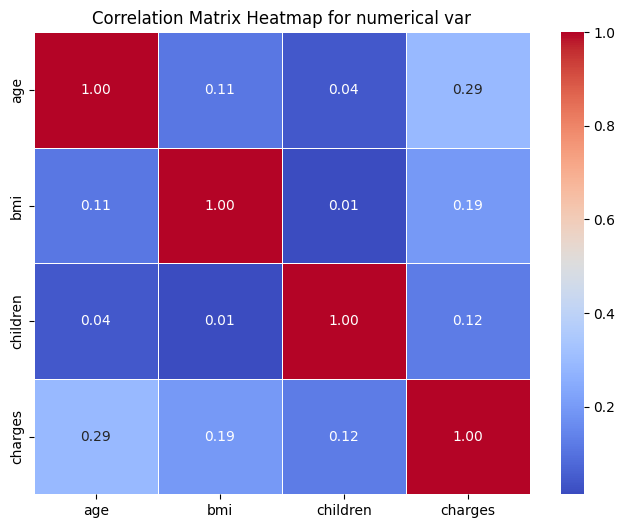

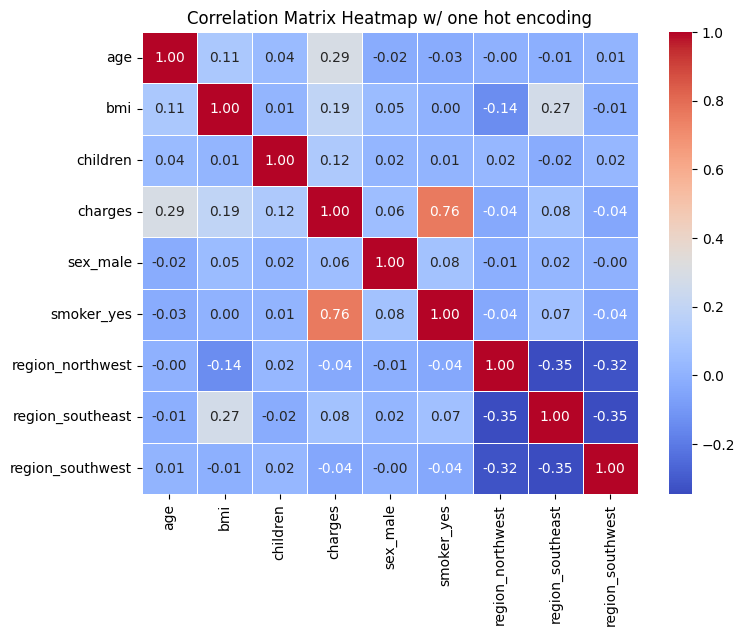

In [9]:
correlation_matrix = insurance_df.select_dtypes(include=['float64', 'int64']).corr()

# SVisualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Display correlation values on the heatmap
    cmap="coolwarm",   # Color map for visualization
    fmt=".2f",         # Format to 2 decimal places
    linewidths=0.5     # Add space between cells
)
plt.title("Correlation Matrix Heatmap for numerical var")
plt.show()


# trying one hot encoding for categorical var
encoded_df = pd.get_dummies(insurance_df, drop_first=True)
correlation_matrix_encoded = encoded_df.corr()

# SVisualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix_encoded,
    annot=True,        # Display correlation values on the heatmap
    cmap="coolwarm",   # Color map for visualization
    fmt=".2f",         # Format to 2 decimal places
    linewidths=0.5     # Add space between cells
)
plt.title("Correlation Matrix Heatmap w/ one hot encoding")
plt.show()




In [10]:
# smoker_yes and charges (0.76)
# Being a smoker is highly correlated with higher charges. This suggests that smokers are likely to have higher medical expenses.

# Moderate Positive Correlations:

# age and charges (0.29)
# There is a moderate positive correlation between age and charges, indicating that older individuals tend to have slightly higher medical costs.

# bmi and charges (0.19)
# Higher BMI shows some correlation with higher charges, possibly reflecting health risks associated with obesity.

# region_southeast and bmi (0.27):
# People in the southeast region tend to have higher BMI values.

# Regional variables (region_northwest, region_southeast, region_southwest) exhibit no significant correlation with charges

In [11]:
# # List of variables to drop
# variables_to_drop = ['sex', 'region']

# # Drop the variables from the DataFrame
# insurance_df = insurance_df.drop(columns=variables_to_drop)

# # # Display the updated DataFrame
# # print("Updated DataFrame:")
# # print(insurance_df.head())


# Modelling time!

## 1. Find the Naive Baseline

Before we build any models, let's establish a naive baseline. This will help us understand how well our models perform compared to a simple approach. In regression problems, the naive baseline is often the mean of the target variable.

### Task:
- Calculate the mean of the target variable 'charges'
- Explain why it's important to establish a naive baseline


In [12]:
charges_mean = round(insurance_df[target_variable].mean(), 2)
print(f"The mean of our target variable '{target_variable}' is {charges_mean}")


# Establishing a naive baseline in regression provides a simple benchmark for model performance. 
# It helps identify if a model is adding value by exagerating trivial predictions, showing overfitting or underfitting. 
# Without a baseline, it's difficult to evaluate MSE or R2 and determine if a model is effective or shoudl be improved.

The mean of our target variable 'charges' is 15799.57


## 2. Initial Modelling Without GridSearch or Pipeline

Let's build a simple linear regression model without any feature engineering, grid search, or pipeline. This will serve as our initial baseline for comparison.

### Task:
- Split the data into training and test sets
- Train a simple linear regression model
- Evaluate its performance using regression metrics
- Write it down as a markdown below so you can keep track. This is a scientific experiment



Performing Linear Regression for Feature: age


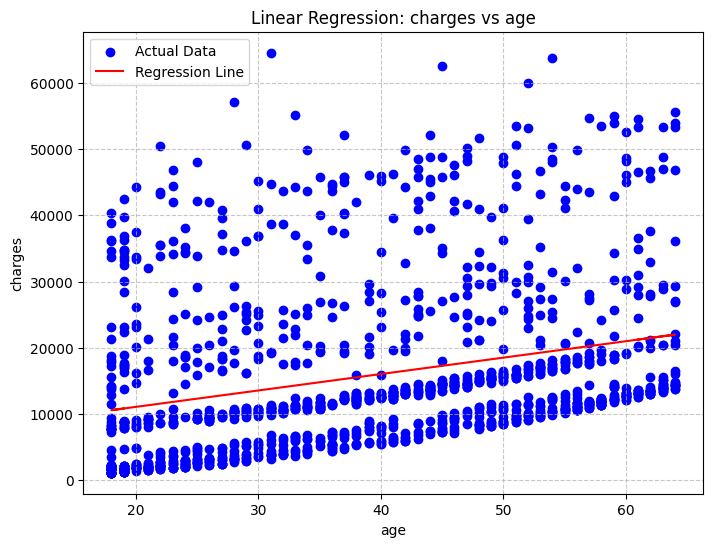


Performing Linear Regression for Feature: bmi


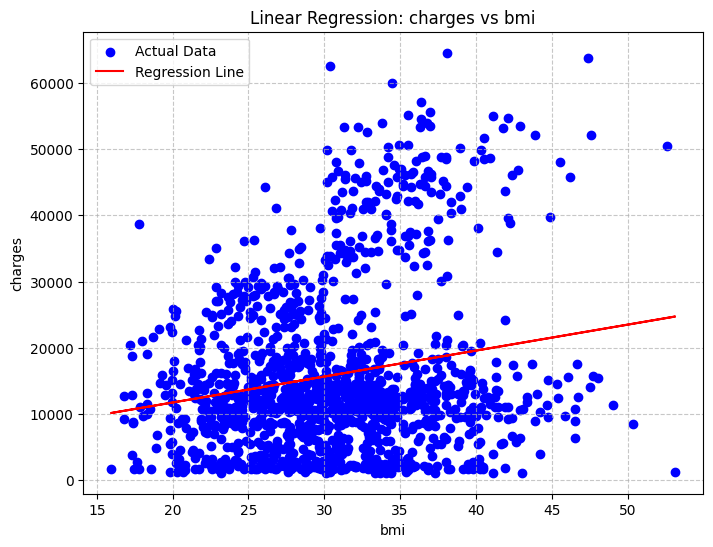


Performing Linear Regression for Feature: children


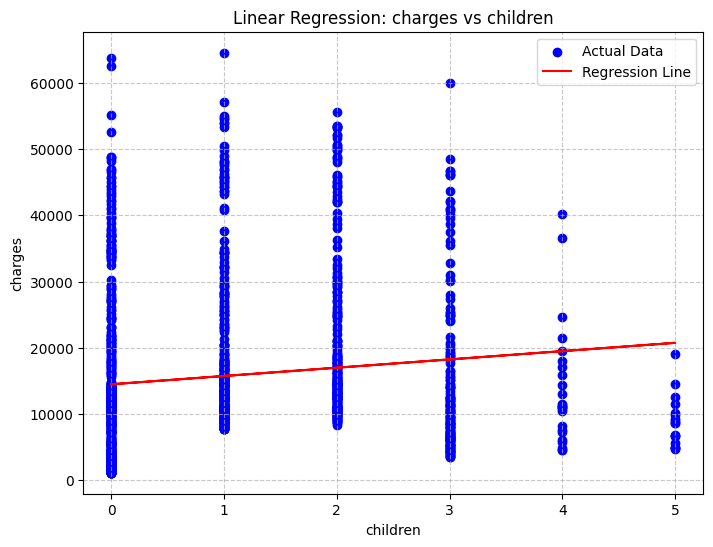


Performing Linear Regression for Feature: smoker_yes


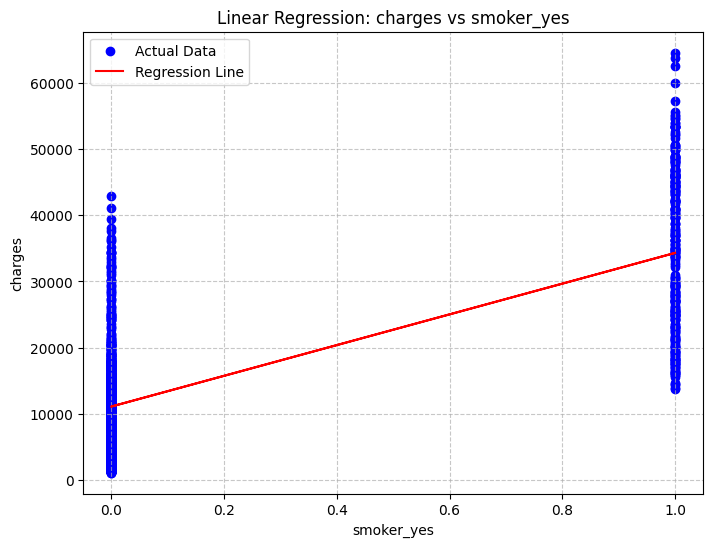


Summary of Results:
+------------+----------------------------+------------------+
| Feature    |   Mean Squared Error (MSE) |   R-squared (R2) |
+============+============================+==================+
| age        |                1.47352e+08 |        0.109583  |
+------------+----------------------------+------------------+
| bmi        |                1.58146e+08 |        0.0443571 |
+------------+----------------------------+------------------+
| children   |                1.63354e+08 |        0.012888  |
+------------+----------------------------+------------------+
| smoker_yes |                6.29262e+07 |        0.619751  |
+------------+----------------------------+------------------+


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


### LOADING INFORMATION ###

# Load the CSV file
file_path = "insurance.csv" 
insurance_df = pd.read_csv(file_path)

# List of variables to drop
variables_to_drop = ['sex', 'region']

# Drop the variables from the DataFrame
insurance_df = insurance_df.drop(columns=variables_to_drop)

# Creating a copy of the DataFrame
insurance_df_copy = insurance_df.copy()
# One-hot encoding for categorical variables
insurance_df_copy_encoded = pd.get_dummies(insurance_df_copy, drop_first=True)

################################################################

# Initialize a list to store the results
results = []

# Loop through all columns in the DataFrame except the target variable
for feature in insurance_df_copy_encoded.columns:
    # Skip the target variable
    if feature == target_variable:
        continue

    print(f"\nPerforming Linear Regression for Feature: {feature}")
    
    # Define the feature (X) as a single column
    X = insurance_df_copy_encoded[[feature]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the results for the current feature
    results.append([feature, mse, r2])
    
    # Visualize the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color="blue", label="Actual Data")
    plt.plot(X, model.predict(X), color="red", label="Regression Line")
    plt.title(f"Linear Regression: {target_variable} vs {feature}")
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.legend()
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

# Create and print a table with the results
headers = ["Feature", "Mean Squared Error (MSE)", "R-squared (R2)"]
print("\nSummary of Results:")
print(tabulate(results, headers=headers, tablefmt="grid"))

In [14]:
# Top Performer:

# smoker_yes:
# MSE: 7.95 × 10^7

# R2: # 0.514
# Insight: Smoking status (smoker_yes) is the strongest predictor of charges.

## 3. Feature Engineering

Now, let's brainstorm and create some new features to see if we can improve the model's performance.

### Questions:
1. Should we create an interaction feature between 'bmi' and 'children'? 
2. Should we create age groups to see if the model improves by categorizing age?
3. Should we create a high-risk indicator based on 'smoker' and 'bmi'?

- Remember nothing is set in stone, this is your experiment, your hypothesis. You may not need to, but its important to explore these questions

### Task:
- Create new features based on the questions above
- Explain the rationale behind each feature



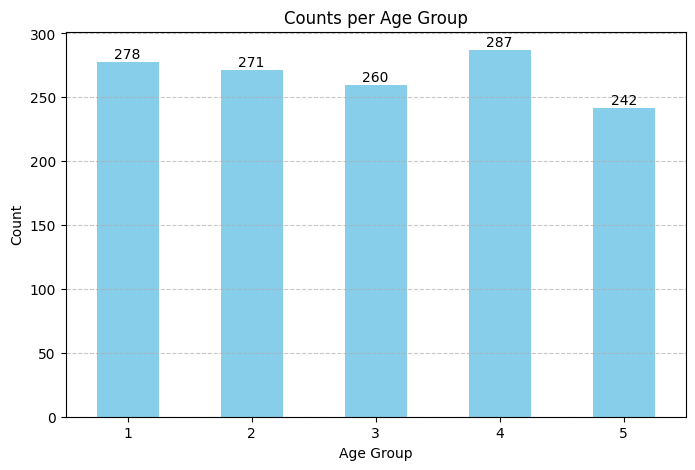

In [15]:
# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['children']
)

# creating age groups

# i found an age group grouping here: United Nations. (1982). Provisional guidelines on standard international age classifications 
# (Statistical Papers, Series M, No. 74). United Nations Department of International Economic and Social Affairs, Statistical Office.
# I will use: 

# 18 - 24 
# 25 - 34 
# 35 - 44 
# 45 - 54 
# 55 - 64 


def assign_age_group(age):
    if 18 <= age <= 24:
        return 1
    elif 25 <= age <= 34:
        return 2
    elif 35 <= age <= 44:
        return 3
    elif 45 <= age <= 54:
        return 4
    elif 55 <= age <= 64:
        return 5
    else:
        return None
    

# Apply the function to create the 'age_group' column
insurance_df_copy_encoded['age_group'] = insurance_df_copy_encoded['age'].apply(assign_age_group)

# det counts per age group
age_group_counts = insurance_df_copy_encoded['age_group'].value_counts().sort_index()

# Plot the counts per age group
plt.figure(figsize=(8, 5))
ax = age_group_counts.plot(kind='bar', color='skyblue')

for i, count in enumerate(age_group_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)
    
plt.title("Counts per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(ticks=range(len(age_group_counts)), labels=age_group_counts.index, rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


Performing Linear Regression for Feature: age


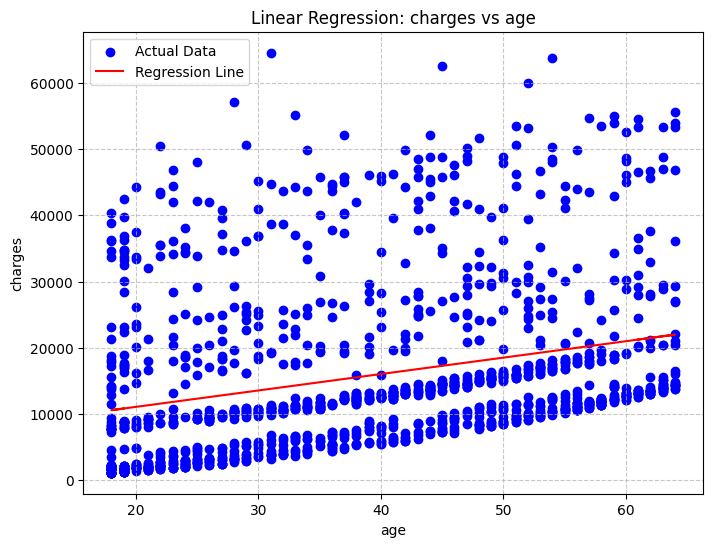


Performing Linear Regression for Feature: bmi


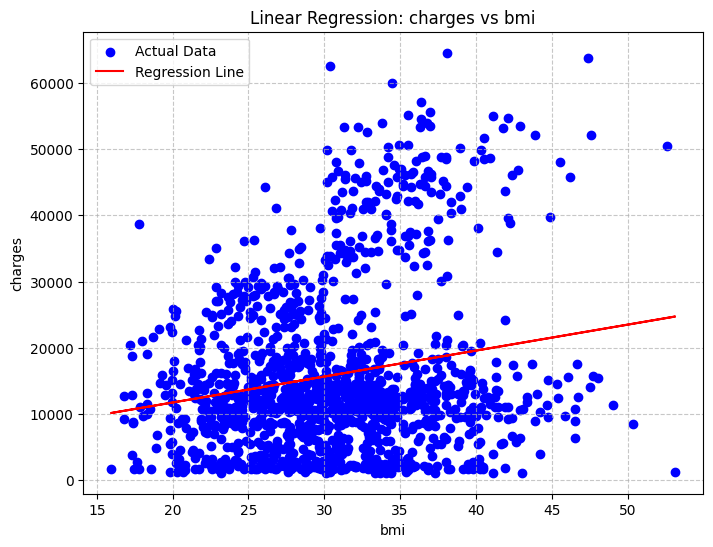


Performing Linear Regression for Feature: children


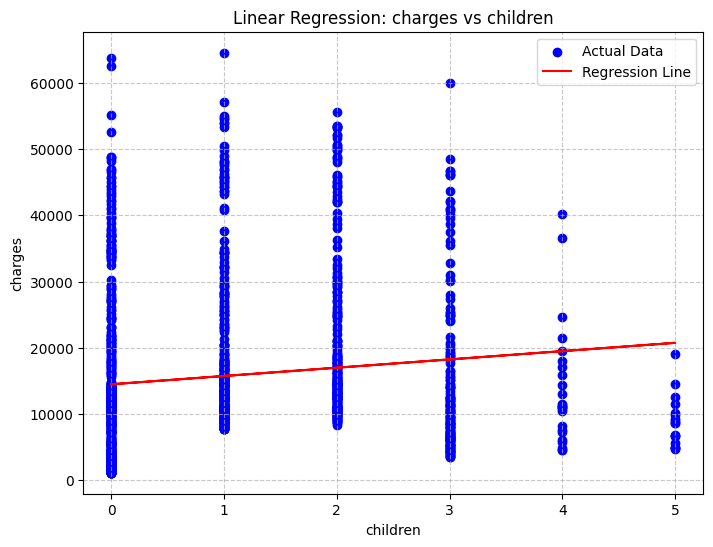


Performing Linear Regression for Feature: smoker_yes


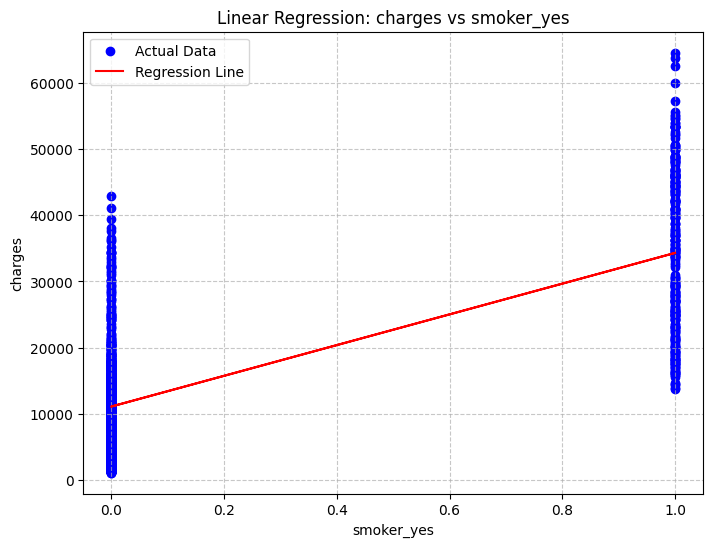


Performing Linear Regression for Feature: bmi_children_interaction


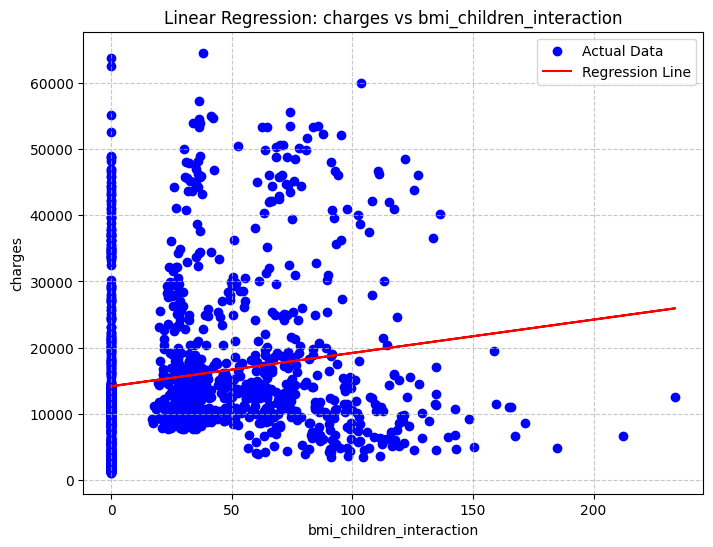


Performing Linear Regression for Feature: age_group


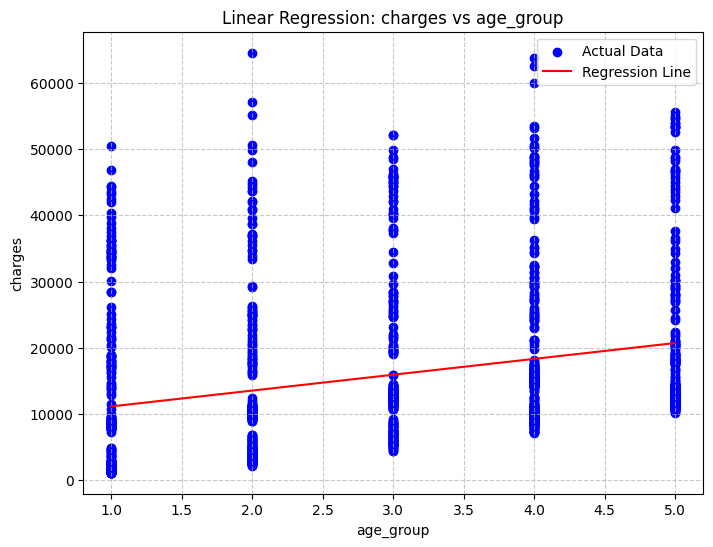


Summary of Results:
+--------------------------+----------------------------+------------------+
| Feature                  |   Mean Squared Error (MSE) |   R-squared (R2) |
+==========================+============================+==================+
| age                      |                1.47352e+08 |        0.109583  |
+--------------------------+----------------------------+------------------+
| bmi                      |                1.58146e+08 |        0.0443571 |
+--------------------------+----------------------------+------------------+
| children                 |                1.63354e+08 |        0.012888  |
+--------------------------+----------------------------+------------------+
| smoker_yes               |                6.29262e+07 |        0.619751  |
+--------------------------+----------------------------+------------------+
| bmi_children_interaction |                1.61902e+08 |        0.0216594 |
+--------------------------+---------------------------

In [16]:
# Initialize a list to store the results
results = []

# Loop through all columns in the DataFrame except the target variable
for feature in insurance_df_copy_encoded.columns:
    # Skip the target variable
    if feature == target_variable:
        continue

    print(f"\nPerforming Linear Regression for Feature: {feature}")
    
    # Define the feature (X) as a single column
    X = insurance_df_copy_encoded[[feature]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the results for the current feature
    results.append([feature, mse, r2])
    
    # Visualize the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color="blue", label="Actual Data")
    plt.plot(X, model.predict(X), color="red", label="Regression Line")
    plt.title(f"Linear Regression: {target_variable} vs {feature}")
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.legend()
    plt.grid(linestyle="--", alpha=0.7)
    plt.show()

# Create and print a table with the results
headers = ["Feature", "Mean Squared Error (MSE)", "R-squared (R2)"]
print("\nSummary of Results:")
print(tabulate(results, headers=headers, tablefmt="grid"))

## 4. Modelling with Feature Engineering

Now that we have new features, let's see if they improve our model's performance.
Did it improve the performance? Yes? No? Why

### Task:
- Split the data into training and test sets
- Train a linear regression model with the new features
- Evaluate its performance using regression metrics


In [17]:
# Insight: Age, whether treated as a continuous variable or categorized into groups, 
# provides modest predictive power for medical charges.

## 5. Modelling with Pipeline and Grid Search

Now, let's see how using pipelines can simplify our workflow and prevent data leakage. We'll also use GridSearchCV to find the best hyperparameters.

### Task:
- Create a pipeline that includes scaling and linear regression
- Define a parameter grid for hyperparameter tuning
- Use GridSearchCV to find the best parameters and evaluate the model performance


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### LOADING INFORMATION ###

# Load the CSV file
file_path = "insurance.csv" 
insurance_df = pd.read_csv(file_path)

# List of variables to drop
variables_to_drop = ['sex', 'region']

# Drop the variables from the DataFrame
insurance_df = insurance_df.drop(columns=variables_to_drop)

# Creating a copy of the DataFrame
insurance_df_copy = insurance_df.copy()
# One-hot encoding for categorical variables
insurance_df_copy_encoded = pd.get_dummies(insurance_df_copy, drop_first=True)

# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['children']
)

# creating age groups

# i found an age group grouping here: United Nations. (1982). Provisional guidelines on standard international age classifications 
# (Statistical Papers, Series M, No. 74). United Nations Department of International Economic and Social Affairs, Statistical Office.
# I will use: 

# 18 - 24 
# 25 - 34 
# 35 - 44 
# 45 - 54 
# 55 - 64 


def assign_age_group(age):
    if 18 <= age <= 24:
        return 1
    elif 25 <= age <= 34:
        return 2
    elif 35 <= age <= 44:
        return 3
    elif 45 <= age <= 54:
        return 4
    elif 55 <= age <= 64:
        return 5
    else:
        return None
    

# Apply the function to create the 'age_group' column
insurance_df_copy_encoded['age_group'] = insurance_df_copy_encoded['age'].apply(assign_age_group)


# Will create interaction group btw bmi and smoker_yes

# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['smoker_yes'])


################################################################



# Define the features (X) and target (y)
X = insurance_df_copy_encoded.drop(columns=['charges'])  
y = insurance_df_copy_encoded['charges']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Scale features
    ('regressor', LinearRegression())   # Apply Linear Regression
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



Mean Squared Error (MSE): 29992376.05
R-squared (R2): 0.82


## 6. Trying Another Model with Pipeline

Let's try using a Gradient Boosting Regressor to see if it performs better.

### Task:
- Create and use a pipeline for Gradient Boosting Regressor
- Define a parameter grid for grid search
- Use GridSearchCV to find the best parameters and evaluate the model


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


### LOADING INFORMATION ###

# Load the CSV file
file_path = "insurance.csv" 
insurance_df = pd.read_csv(file_path)

# List of variables to drop
variables_to_drop = ['sex', 'region']

# Drop the variables from the DataFrame
insurance_df = insurance_df.drop(columns=variables_to_drop)

# Creating a copy of the DataFrame
insurance_df_copy = insurance_df.copy()
# One-hot encoding for categorical variables
insurance_df_copy_encoded = pd.get_dummies(insurance_df_copy, drop_first=True)

# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['children']
)

# creating age groups

# i found an age group grouping here: United Nations. (1982). Provisional guidelines on standard international age classifications 
# (Statistical Papers, Series M, No. 74). United Nations Department of International Economic and Social Affairs, Statistical Office.
# I will use: 

# 18 - 24 
# 25 - 34 
# 35 - 44 
# 45 - 54 
# 55 - 64 


def assign_age_group(age):
    if 18 <= age <= 24:
        return 1
    elif 25 <= age <= 34:
        return 2
    elif 35 <= age <= 44:
        return 3
    elif 45 <= age <= 54:
        return 4
    elif 55 <= age <= 64:
        return 5
    else:
        return None
    

# Apply the function to create the 'age_group' column
insurance_df_copy_encoded['age_group'] = insurance_df_copy_encoded['age'].apply(assign_age_group)


# Will create interaction group btw bmi and smoker_yes

# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['smoker_yes'])


################################################################




X = insurance_df_copy_encoded.drop(columns=['charges'])  
y = insurance_df_copy_encoded['charges']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                 # Scale features
    ('regressor', GradientBoostingRegressor(      # Gradient Boosting
        n_estimators=100,                         # Hyperparameter: Number of boosting stages
        learning_rate=0.1,                        # Hyperparameter: Learning rate
        max_depth=3,                              # Hyperparameter: Maximum depth of trees
        random_state=42                           # For reproducibility
    ))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 18909492.93
R-squared (R2): 0.89


In [20]:
# Gradient Boosting Regressor is much better linear regression model for this dataset

## 7. GridSearch with Several Models

Finally, let's compare several models using GridSearchCV to find the best one.

### Task:
- Define multiple models and their parameter grids
- Use GridSearchCV to find the best model and parameters


In [21]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


### LOADING INFORMATION ###

# Load the CSV file
file_path = "insurance.csv" 
insurance_df = pd.read_csv(file_path)

# List of variables to drop
variables_to_drop = ['sex', 'region']

# Drop the variables from the DataFrame
insurance_df = insurance_df.drop(columns=variables_to_drop)

# Creating a copy of the DataFrame
insurance_df_copy = insurance_df.copy()
# One-hot encoding for categorical variables
insurance_df_copy_encoded = pd.get_dummies(insurance_df_copy, drop_first=True)

# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['children']
)

# creating age groups

# i found an age group grouping here: United Nations. (1982). Provisional guidelines on standard international age classifications 
# (Statistical Papers, Series M, No. 74). United Nations Department of International Economic and Social Affairs, Statistical Office.
# I will use: 

# 18 - 24 
# 25 - 34 
# 35 - 44 
# 45 - 54 
# 55 - 64 


def assign_age_group(age):
    if 18 <= age <= 24:
        return 1
    elif 25 <= age <= 34:
        return 2
    elif 35 <= age <= 44:
        return 3
    elif 45 <= age <= 54:
        return 4
    elif 55 <= age <= 64:
        return 5
    else:
        return None
    

# Apply the function to create the 'age_group' column
insurance_df_copy_encoded['age_group'] = insurance_df_copy_encoded['age'].apply(assign_age_group)


# Will create interaction group btw bmi and smoker_yes

# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['smoker_yes'])


################################################################

X = insurance_df_copy_encoded.drop(columns=['charges'])  
y = insurance_df_copy_encoded['charges'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and their parameter grids
models_and_parameters = [
    {
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False]
    },
    {
        'model': [GradientBoostingRegressor()],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5]
    },
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10],
        'model__min_samples_split': [2, 5]
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('model', LinearRegression())  
])

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline, 
    param_grid=models_and_parameters, 
    cv=5,  # n-fold cross-validation
    scoring='r2', 
    n_jobs=-1 
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print(f"Test Set Mean Squared Error (MSE): {mse:.2f}")
print(f"Test Set R-squared (R2): {r2:.2f}")

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor(learning_rate=0.05))])
Best Parameters: {'model': GradientBoostingRegressor(), 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
Test Set Mean Squared Error (MSE): 19311296.92
Test Set R-squared (R2): 0.88


In [22]:
# Results without dropping any data:

# Best Model: Pipeline(steps=[('scaler', StandardScaler()),
#                 ('model', GradientBoostingRegressor(learning_rate=0.05))])
# Best Parameters: {'model': GradientBoostingRegressor(), 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
# Test Set Mean Squared Error (MSE): 25607456.22
# Test Set R-squared (R2): 0.84


# Dropping 'sex' and 'region' improved. 
# Best Model: Pipeline(steps=[('scaler', StandardScaler()),
#                 ('model', GradientBoostingRegressor(learning_rate=0.05))])
# Best Parameters: {'model': GradientBoostingRegressor(), 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
# Test Set Mean Squared Error (MSE): 19311296.92
# Test Set R-squared (R2): 0.88




In [23]:
# Trying XGBoost, Random Forest Regressor, MLPRegressor


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

### LOADING INFORMATION ###

# Load the CSV file
file_path = "insurance.csv" 
insurance_df = pd.read_csv(file_path)

# List of variables to drop
variables_to_drop = ['sex', 'region']

# Drop the variables from the DataFrame
insurance_df = insurance_df.drop(columns=variables_to_drop)

# Creating a copy of the DataFrame
insurance_df_copy = insurance_df.copy()
# One-hot encoding for categorical variables
insurance_df_copy_encoded = pd.get_dummies(insurance_df_copy, drop_first=True)

# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['children']
)

# creating age groups

# i found an age group grouping here: United Nations. (1982). Provisional guidelines on standard international age classifications 
# (Statistical Papers, Series M, No. 74). United Nations Department of International Economic and Social Affairs, Statistical Office.
# I will use: 

# 18 - 24 
# 25 - 34 
# 35 - 44 
# 45 - 54 
# 55 - 64 


def assign_age_group(age):
    if 18 <= age <= 24:
        return 1
    elif 25 <= age <= 34:
        return 2
    elif 35 <= age <= 44:
        return 3
    elif 45 <= age <= 54:
        return 4
    elif 55 <= age <= 64:
        return 5
    else:
        return None
    

# Apply the function to create the 'age_group' column
insurance_df_copy_encoded['age_group'] = insurance_df_copy_encoded['age'].apply(assign_age_group)


# Will create interaction group btw bmi and smoker_yes

# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['smoker_yes'])


################################################################


# Define the features (X) and target (y)
X = insurance_df_copy_encoded.drop(columns=['charges'])  # Drop the target variable
y = insurance_df_copy_encoded['charges']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their parameter grids
param_grids = [
    # XGBoost
    {
        'model': [XGBRegressor()],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5],
        'model__subsample': [0.8, 1.0]
    },
    # Random Forest Regressor
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, None],
        'model__min_samples_split': [2, 5],
    },
    # MLP Regressor
    {
        'model': [MLPRegressor()],
        'model__hidden_layer_sizes': [(100,), (100, 50)],
        'model__activation': ['relu', 'tanh'],
        'model__solver': ['adam'],
        'model__learning_rate': ['constant', 'adaptive'],
        'model__max_iter': [1000],
        'model__alpha': [0.0001, 0.001]
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', XGBRegressor())  
])

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grids,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Evaluate using R-squared
    n_jobs=-1  # Use all available cores
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print(f"Test Set Mean Squared Error (MSE): {mse:.2f}")
print(f"Test Set R-squared (R2): {r2:.2f}")


C:\Users\Dan\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\Dan\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:409: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)
C:\Users\Dan\AppData\Roaming\Python\Python310\site-packages\sklea

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_split=5))])
Best Parameters: {'model': RandomForestRegressor(), 'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Test Set Mean Squared Error (MSE): 20922382.45
Test Set R-squared (R2): 0.87


In [24]:
# GradientBoostingRegressor worked best, using this to 
# test hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2', None],
}

# Initialize GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best R²:", grid_search.best_score_)







Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Best R²: 0.8586926115318363


# Machine Learning: Master Challenge

## 8. Calculating Potential Cost or Loss

### Challenge:
Now that you've built and optimized your models, it's time for the final challenge! Your task is to minimize the Root Mean Squared Error (RMSE) of your model's predictions and calculate the potential financial impact of your model's errors.

### Task:
1. Calculate the RMSE of your final model's predictions.
2. Break down the errors into underestimation and overestimation.
3. Calculate the total potential cost or loss to the company.
4. Compete with your classmates to see who can achieve the lowest RMSE and financial impact!

### Explanation:
The RMSE provides an estimate of the average error in your model's predictions. We will also analyze the errors by categorizing them into underestimations and overestimations to understand their financial impact.

#### Steps to Calculate Underestimation and Overestimation Errors:

1. **Calculate RMSE**:
   - Use the `mean_squared_error` function from `sklearn.metrics` and pass your actual values (`y_test`) and predicted values (`y_pred_final`) to it.
   - Take the square root of the result to get the RMSE.
   
2. **Calculate Underestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are greater than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the actual and predicted charges.
   - Sum these differences to get the total underestimation error.

3. **Calculate Overestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are less than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the predicted and actual charges.
   - Sum these differences to get the total overestimation error.

4. **Calculate Total Potential Cost or Loss**:
   - Add the total underestimation error and the total overestimation error to get the total potential cost or loss.

### Let's see who can build the best model!

#### Detailed Instructions:

1. **Calculate RMSE**:
   - Use `mean_squared_error` with `y_test` and `y_pred_final`.
   - Use `np.sqrt` to take the square root of the result.

2. **Calculate Underestimation Error**:
   - Use a boolean condition to filter `y_test` values that are greater than `y_pred_final`.
   - Subtract the predicted values from the actual values for these instances.
   - Sum these differences.

3. **Calculate Overestimation Error**:
   - Use a boolean condition to filter `y_test` values that are less than `y_pred_final`.
   - Subtract the actual values from the predicted values for these instances.
   - Sum these differences.

4. **Calculate Total Potential Cost or Loss**:
   - Add the results of the underestimation error and overestimation error to get the total potential cost or loss.

### Example Walkthrough:

1. **Calculate RMSE**:
   - `rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))`
   - This gives you the average prediction error in dollars.

2. **Calculate Underestimation Error**:
   - `underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])`
   - This gives you the total amount by which the model undercharged.

3. **Calculate Overestimation Error**:
   - `overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])`
   - This gives you the total amount by which the model overcharged.

4. **Calculate Total Potential Cost or Loss**:
   - `total_potential_loss = underestimation_error + overestimation_error`
   - This gives you the total financial impact of the model's errors.

### Leaderboard:
Post your RMSE score and total potential cost or loss on the class leaderboard. The student with the lowest RMSE and total potential cost or loss wins bragging rights

### Post Your Results 

- Name
- Model Type
- RMSE
- Underestimation Error
- Overestimation Error
- Total Potential Cost/Loss

In [32]:
import numpy as np

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
model_name = type(best_model).__name__

### CURRENT BEST RESULTS ###

# best_model is the trained pipeline with GradientBoostingRegressor
y_pred_final = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Convert y_test and y_pred_final to pandas Series
y_test_series = pd.Series(y_test.reset_index(drop=True))  # Align indices
y_pred_series = pd.Series(y_pred_final)

# Boolean mask for underestimation (actual > predicted)
underestimation_mask = y_test_series > y_pred_series

# Boolean mask for overestimation (predicted > actual)
overestimation_mask = y_test_series < y_pred_series

# Calculate underestimation error
underestimation_error = np.sum(y_test_series[underestimation_mask] - y_pred_series[underestimation_mask])

# Calculate overestimation error
overestimation_error = np.sum(y_pred_series[overestimation_mask] - y_test_series[overestimation_mask])

# Calculate total potential cost or loss
total_potential_loss = underestimation_error + overestimation_error

# Print the results
print(f'Name: Dan Bigman')
print(f'Model name: {model_name}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Total Underestimation Error: {underestimation_error:.2f}")
print(f"Total Overestimation Error: {overestimation_error:.2f}")
print(f"Total Potential Loss: {total_potential_loss:.2f}")


Name: Dan Bigman
Model name: GradientBoostingRegressor
Root Mean Squared Error (RMSE): 4574.10
Total Underestimation Error: 297024.87
Total Overestimation Error: 386826.33
Total Potential Loss: 683851.20


In [26]:
# Root Mean Squared Error (RMSE): 5322.00

# Best model: GradientBoostingRegressor
# Root Mean Squared Error (RMSE): 5003.65

# Eliminating variables
# Root Mean Squared Error (RMSE): 4402.54




In [47]:
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score
### LOADING INFORMATION ###

# # Load the CSV file
# file_path = "insurance.csv" 
# insurance_df = pd.read_csv(file_path)

# # List of variables to drop
# variables_to_drop = ['sex', 'region']

# # Drop the variables from the DataFrame
# insurance_df = insurance_df.drop(columns=variables_to_drop)

# # Creating a copy of the DataFrame
# insurance_df_copy = insurance_df.copy()
# # One-hot encoding for categorical variables
# insurance_df_copy_encoded = pd.get_dummies(insurance_df_copy, drop_first=True)

# # Create the interaction feature btw 'bmi' and 'children'
# insurance_df_copy_encoded['bmi_children_interaction'] = (
#     insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['children']
# )

# # creating age groups

# # i found an age group grouping here: United Nations. (1982). Provisional guidelines on standard international age classifications 
# # (Statistical Papers, Series M, No. 74). United Nations Department of International Economic and Social Affairs, Statistical Office.
# # I will use: 

# # 18 - 24 
# # 25 - 34 
# # 35 - 44 
# # 45 - 54 
# # 55 - 64 


# def assign_age_group(age):
#     if 18 <= age <= 24:
#         return 1
#     elif 25 <= age <= 34:
#         return 2
#     elif 35 <= age <= 44:
#         return 3
#     elif 45 <= age <= 54:
#         return 4
#     elif 55 <= age <= 64:
#         return 5
#     else:
#         return None
    

# # Apply the function to create the 'age_group' column
# insurance_df_copy_encoded['age_group'] = insurance_df_copy_encoded['age'].apply(assign_age_group)


# # Will create interaction group btw bmi and smoker_yes

# # Create the interaction feature btw 'bmi' and 'children'
# insurance_df_copy_encoded['bmi_children_interaction'] = (
#     insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['smoker_yes'])


################################################################


# # Define the features (X) and target (y)
# X = insurance_df_copy_encoded.drop(columns=['charges'])  # Drop the target variable
# y = insurance_df_copy_encoded['charges']  # Target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# # Expanded hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 300, 500],             # Number of trees
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Step size
#     'max_depth': [3, 5, 7, 10],                 # Maximum tree depth
#     'min_samples_split': [2, 5, 10],            # Minimum samples to split a node
#     'min_samples_leaf': [1, 3, 5],              # Minimum samples in a leaf node
#     'subsample': [0.8, 1.0],                    # Fraction of samples for training each tree
#     'max_features': ['sqrt', 'log2', None],     # Features considered at each split
# }

# # Initialize GradientBoostingRegressor
# gbr = GradientBoostingRegressor(random_state=42)

# # Perform GridSearchCV
# grid_search = GridSearchCV(
#     estimator=gbr,
#     param_grid=param_grid,
#     cv=5,                      # 5-fold cross-validation
#     scoring='r2',              # Evaluate using R² score
#     n_jobs=-1,                 # Use all available cores
#     verbose=2                  # Detailed output during training
# )

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Get the best model and parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Evaluate the best model on the test set
# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Print results
# print("Best Parameters:", best_params)
# print(f"Test Set Mean Squared Error (MSE): {mse:.2f}")
# print(f"Test Set R-squared (R2): {r2:.2f}")


In [1]:
import gurobipy as gp
from gurobipy import GRB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

### LOADING INFORMATION ###

# Load the CSV file
file_path = "insurance.csv" 
insurance_df = pd.read_csv(file_path)

# List of variables to drop
variables_to_drop = ['sex', 'region']

# Drop the variables from the DataFrame
insurance_df = insurance_df.drop(columns=variables_to_drop)

# Creating a copy of the DataFrame
insurance_df_copy = insurance_df.copy()
# One-hot encoding for categorical variables
insurance_df_copy_encoded = pd.get_dummies(insurance_df_copy, drop_first=True)

# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['children']
)

# creating age groups

# i found an age group grouping here: United Nations. (1982). Provisional guidelines on standard international age classifications 
# (Statistical Papers, Series M, No. 74). United Nations Department of International Economic and Social Affairs, Statistical Office.
# I will use: 

# 18 - 24 
# 25 - 34 
# 35 - 44 
# 45 - 54 
# 55 - 64 


def assign_age_group(age):
    if 18 <= age <= 24:
        return 1
    elif 25 <= age <= 34:
        return 2
    elif 35 <= age <= 44:
        return 3
    elif 45 <= age <= 54:
        return 4
    elif 55 <= age <= 64:
        return 5
    else:
        return None
    

# Apply the function to create the 'age_group' column
insurance_df_copy_encoded['age_group'] = insurance_df_copy_encoded['age'].apply(assign_age_group)


# Will create interaction group btw bmi and smoker_yes

# Create the interaction feature btw 'bmi' and 'children'
insurance_df_copy_encoded['bmi_children_interaction'] = (
    insurance_df_copy_encoded['bmi'] * insurance_df_copy_encoded['smoker_yes'])


################################################################

X = insurance_df_copy_encoded.drop(columns=['charges'])
y = insurance_df_copy_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Create a Gurobi model
model = gp.Model("HyperparameterOptimization")

# Define hyperparameter decision variables
learning_rate = model.addVar(lb=0.01, ub=0.2, vtype=GRB.CONTINUOUS, name="learning_rate")
n_estimators = model.addVar(lb=100, ub=500, vtype=GRB.INTEGER, name="n_estimators")
max_depth = model.addVar(lb=3, ub=10, vtype=GRB.INTEGER, name="max_depth")
min_samples_split = model.addVar(lb=2, ub=10, vtype=GRB.INTEGER, name="min_samples_split")
min_samples_leaf = model.addVar(lb=1, ub=5, vtype=GRB.INTEGER, name="min_samples_leaf")

# Objective: Maximize R² (placeholder, will be updated dynamically)
model.setObjective(1, GRB.MAXIMIZE)

# Update the model
model.update()

# Function to evaluate R² for a given set of hyperparameters
def evaluate_r2(learning_rate_val, n_estimators_val, max_depth_val, min_samples_split_val, min_samples_leaf_val):
    gbr = GradientBoostingRegressor(
        learning_rate=learning_rate_val,
        n_estimators=int(n_estimators_val),
        max_depth=int(max_depth_val),
        min_samples_split=int(min_samples_split_val),
        min_samples_leaf=int(min_samples_leaf_val),
        random_state=27
    )
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    return r2_score(y_test, y_pred)

# Callback to dynamically calculate R² and update the objective
def callback(model, where):
    if where == GRB.Callback.MIPNODE:
        # Retrieve the current values of the variables
        lr = model.cbGetSolution(learning_rate)
        ne = model.cbGetSolution(n_estimators)
        md = model.cbGetSolution(max_depth)
        mss = model.cbGetSolution(min_samples_split)
        msl = model.cbGetSolution(min_samples_leaf)

        # Evaluate the R² score
        r2 = evaluate_r2(lr, ne, md, mss, msl)

        # Update the objective function
        model.cbSetSolution(model.getObjective(), r2)

# Optimize the model
model.optimize(callback)

# Retrieve the best hyperparameters and evaluate final R²
if model.status == GRB.OPTIMAL:
    best_lr = learning_rate.X
    best_ne = n_estimators.X
    best_md = max_depth.X
    best_mss = min_samples_split.X
    best_msl = min_samples_leaf.X

    print(f"Optimal Hyperparameters:")
    print(f"  Learning Rate: {best_lr:.3f}")
    print(f"  Number of Estimators: {int(best_ne)}")
    print(f"  Max Depth: {int(best_md)}")
    print(f"  Min Samples Split: {int(best_mss)}")
    print(f"  Min Samples Leaf: {int(best_msl)}")

    # Final evaluation
    final_r2 = evaluate_r2(best_lr, best_ne, best_md, best_mss, best_msl)
    print(f"Final R² Score on Test Data: {final_r2:.4f}")
else:
    print("Optimization did not converge.")


Restricted license - for non-production use only - expires 2026-11-23
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-7400T CPU @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 0 rows, 5 columns and 0 nonzeros
Model fingerprint: 0xeb5e90f1
Variable types: 1 continuous, 4 integer (0 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e-02, 5e+02]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 1.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 1: 1 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+00, best bound 1.000000000000e+00, gap 0.0000%

User-callback calls 24, time in user-callback 0.00 sec
Optimal Hyperparamet

## Conclusion

Congratulations! You've completed the lab. Here's a summary of what we've covered:
1. Established a naive baseline using the mean of the target variable.
2. Built an initial linear regression model without any feature engineering or optimization.
3. Performed feature engineering to create new, potentially useful features.
4. Used pipelines and GridSearchCV to optimize the model.
5. Evaluated the final model's performance using RMSE to understand its business impact.

By following these steps, you now have a robust understanding of how to approach a regression problem, from initial exploration to model optimization and business impact assessment. Great job!
